In [160]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [161]:
import sys
sys.path.append('/gdrive/My Drive/2nd Sem/IBM/Covid Project/Code/Scraping Twitter Data')

In [162]:
import copy
import tweepy
import private
import numpy as np
import pandas as pd

In [163]:
auth = tweepy.OAuthHandler(private.CONSUMER_KEY, private.CONSUMER_SECRET)
auth.set_access_token(private.OAUTH_TOKEN, private.OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

In [171]:
df = pd.read_csv(r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Scraping Tweets Demo/covid_tweets_with_user_features.csv")
df

,tweet_id,tweet_text,tweet_link,desc,real_name,user_handle,user_id,chars_in_desc,chars_in_real_name,chars_in_user_handle,num_matches,total_urls_in_desc,official_url_exists,followers_count,friends_count,listed_count,favourites_count,geo_enabled,acc_created_on,acc_life,verified,num_tweets,protected,posting_frequency,latest_tweet_time,activity,avg_likes_per_tweet,follower_friends_ratio,too_much_cleaned_tweet,label
0,1277587874100068355,"rt @pibagartala: covid_19 ২৯ জুন, ২০২০ সকাল ৮....",http://twitter.com/anyuser/status/127758787410...,"Student in Dharmanagar, Govt Degree College...",Pranendu Bhattacharjee,PranenduBhatta1,1249580478950076418,46,22,15,3,0,0,99,77,0,1751,0,"['Mon', 'Apr', '13', '06:09:53', '+0000', '2020']",77,0,1754,0,22.779221,"['Mon', 'Jun', '29', '13:01:24', '+0000', '2020']",0,0.998290,1.285714,"২৯ জুন, ২০২০ সকাল ৮. টা পর্যন্ত ত্রিপুরায় কোভ...",1
1,1277585827514777600,rt @asishsahoo12341: নয়াগ্রাম ব্লক তৃণমূল কংগ...,http://twitter.com/anyuser/status/127758582751...,Thanks God.,Kalipada Dandapat,KalipadaDandap3,1257296248379305984,11,17,15,3,0,0,21,8,0,220,0,"['Mon', 'May', '04', '13:09:36', '+0000', '2020']",56,0,237,0,4.232143,"['Mon', 'Jun', '29', '12:53:13', '+0000', '2020']",0,0.928270,2.625000,নয়াগ্রাম ব্লক তৃণমূল কংগ্রেসের সম্মানীয় সভাপ...,2
2,1277580484164243456,@dharmayuddhaa @mamataofficial মাথামোটা! তোর ব...,http://twitter.com/anyuser/status/127758048416...,Economics Bsc (Hons) student | R.K. Ashramian ...,Subhayan Mukherjee Tito,titomukherjee15,861548391972700161,125,23,15,2,0,1,963,1097,0,50178,1,"['Mon', 'May', '08', '11:48:38', '+0000', '2017']",1148,0,10773,0,9.384146,"['Mon', 'Jun', '29', '12:38:26', '+0000', '2020']",0,4.657755,0.877849,মাথামোটা! তোর বাপ দিয়েছিল দেখ।,2
3,1277578556596383748,১৫ জুলাই অবধি বিশেষ ট্রেন চলাচল বন্ধ তামিলনাড়...,http://twitter.com/anyuser/status/127757855659...,Facebook: https://t.co/vQFs4apIJo\nYoutube Cha...,Aajkaal Official,aajkaalofficial,795241907597123584,111,16,15,3,3,1,354,134,1,11,0,"['Sun', 'Nov', '06', '12:30:20', '+0000', '2016']",1331,0,4138,0,3.108941,"['Mon', 'Jun', '29', '12:23:58', '+0000', '2020']",0,0.002658,2.641791,১৫ জুলাই অবধি বিশেষ ট্রেন চলাচল বন্ধ তামিলনাড়ুতে,3
4,1277578344754630662,করোনা থেকে সেরে ওঠা ব্যক্তিদের সরকারি হাসপাতাল...,http://twitter.com/anyuser/status/127757834475...,"From politics to sports, latest news for the B...",Hindustan Times Bangla,HT_Bangla,1192400038216916992,79,22,9,4,0,1,693,21,1,2,0,"['Thu', 'Nov', '07', '11:15:32', '+0000', '2019']",235,1,10721,0,45.621277,"['Mon', 'Jun', '29', '12:34:08', '+0000', '2020']",0,0.000187,33.000000,করোনা থেকে সেরে ওঠা ব্যক্তিদের সরকারি হাসপাতাল...,3
5,1277578048166977536,"দিল্লীৰ নিচিনা ঠাইত শুনিব পোৱা মতে, covid পৰীক...",http://twitter.com/anyuser/status/127757804816...,"I like traveling, sense of humor, video games,...",Angira Bharadwaj,BharadwajAngira,1058272790745206784,88,16,15,2,0,0,493,321,1,2412,0,"['Fri', 'Nov', '02', '08:21:09', '+0000', '2018']",605,0,3921,0,6.480992,"['Mon', 'Jun', '29', '13:00:32', '+0000', '2020']",0,0.615149,1.535826,"দিল্লীৰ নিচিনা ঠাইত শুনিব পোৱা মতে, পৰীক্ষা কৰ...",3
6,1277578021000450048,"covid যোদ্ধাদের কুর্নিশ রাজ্য সরকারের, ১ জুলাই...",http://twitter.com/anyuser/status/127757802100...,I am determined to be cheerful & happy in what...,ARIJIT KR. ROY🇮🇳😷,IamArijitRoy,89647717,151,17,12,3,0,0,104,567,4,13434,0,"['Fri', 'Nov', '13', '07:17:25', '+0000', '2009']",3881,0,27389,0,7.057202,"['Mon', 'Jun', '29', '12:55:14', '+0000', '2020']",0,0.490489,0.183422,"যোদ্ধাদের কুর্নিশ রাজ্য সরকারের, ১ জুলাই রাজ্য...",3
7,1277577535216250880,এবার স্বাস্থ্য পরিসেবায় সরাসরি অংশগ্রহণ করবেন...,http://twitter.com/anyuser/status/127757753521...,General Secretary of Surendranath Law College ...,অমিতাভ || Amitava,AdvAmitavaAich,1272195565632262144,157,17,14,2,0,0,88,233,0,646,0,"['Sun', 'Jun', '14', '15:54:07', '+0000', '2020']",15,0,93,0,6.200000,"['Mon', 'Jun', '29', '12:23:00', '+0000', '2020']",0,6.946237,0.377682,এবার স্বাস্থ্য পরিসেবায় সরাসরি অংশগ্রহণ করব

In [167]:
starting_index = 3

In [173]:
counter = 0
for i in range(starting_index,len(df)):

    if(df.iloc[i]['label']==3):

        tweet = api.get_status(df.iloc[i]['tweet_id'],tweet_mode='extended')
        link = "http://twitter.com/anyuser/status/" + tweet.id_str

        print(df.iloc[i]['tweet_text'])
        print(link)

        choice = input("Does the above tweet have a verifiable claim?  (1 --> Yes, 2 --> No, 3 --> Maybe) ")
        if choice!= 3:
            df.at[i,'label'] = choice
        else:
            continue
    counter = counter + 1
    if(counter>2):
            break 
    

3    10
2     2
1     1
Name: label, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f860b696978>]],
      dtype=object)

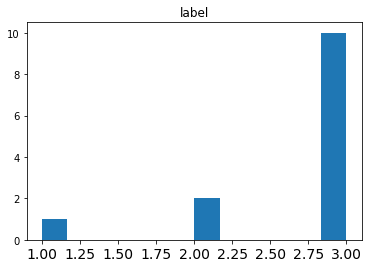

In [169]:
frequencies = df['label'].value_counts()
print(frequencies)

df.hist(column='label',grid=False,bins=12,xlabelsize=14)

In [170]:
df.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Scraping Tweets Demo/covid_tweets_with_user_features.csv",index=False)